### Final Project: Digit Recognizer Competition
#### Team Members: Paula Palles, Aaron Amankwaah, Nikhil Pandey

Our goal is to go out of the scope of the class using the MNIST dataset. This is a simple digit dataset that we want to use to try many different classification models to benchmark them. Our goal is to use Neural Networks, SVMs, and K-Nearest Neighbor with different parameters to see how the parameters affect the final result.

For **K-Nearest Neighbors**, we will focus on the K-Neighbors parameter.

For **Support Vector Machines**...

For **Neural Networks**, we will focus on using sequential and convulation neural networks to compare them. We will also train our model with different amounts of hidden layers. For the scope of this project, we will use base-8 outputs (will be more aparent during the code). We will also look at runtime differences between GPU and CPU training. Finally, we will test how batch size and epoches affect the final result.

Our goal at the end of all the models is to be able to generate a through report of the models by comparing them and also integrating our models with a live canvas where users can input their own hand drawn numbers and immediately see the result from our models.

Dataset was obtained through Kaggle: https://www.kaggle.com/competitions/digit-recognizer


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand
import torch

### Cleaning and Exploratory Data Analysis

Our goal is to get the data and verify its contents. Specifically we are looking to check for data types and nulls. We are also looking to visualize different aspects of the data with the goal of better understanding it. After that is done, we want to take the appropirate actions to clean and format the dataset to prepare it for our models.

In [4]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Gets types of first 5 columns
print("Training Types Head:", str(list(train.dtypes)[0:5]))
print("Testing Types Head:", str(list(train.dtypes)[0:5]))

Training Types Head: [dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')]
Testing Types Head: [dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')]


In [7]:
# Verifies all columns are integers
flag = True
for col in train.dtypes:
    if str(col) != 'int64':
        flag = False
print("All Training Columns are Integers: " + str(flag))

flag = True
for col in test.dtypes:
    if str(col) != 'int64':
        flag = False
print("All Testing Columns are Integers: " + str(flag))
        

All Training Columns are Integers: True
All Testing Columns are Integers: True


In [8]:
# Makes sure there are no nulls
print("Total Training Nulls:", train.isna().sum().sum())
print("Total Test Nulls:", train.isna().sum().sum())

Total Training Nulls: 0
Total Test Nulls: 0


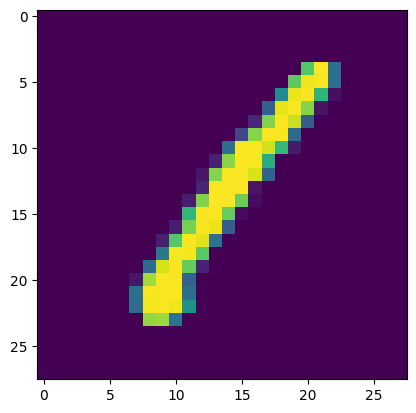

In [9]:
# Displays the first digit from the data
plt.imshow(train.iloc[0,1:].values.reshape(28,28))

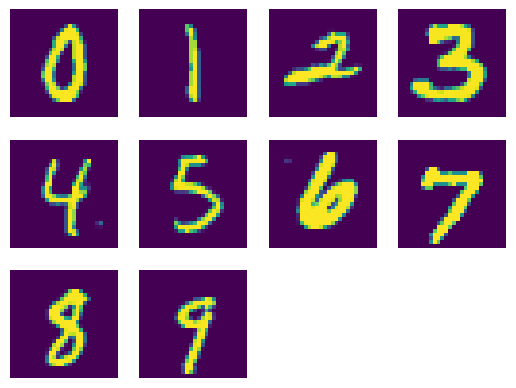

In [10]:
for i in range(10):
    digit_data = train[train.label == i]
    digit_data = digit_data.iloc[rand.randint(0, digit_data.shape[0]), 1:]
    plt.subplot(3, 4, i + 1)
    plt.imshow(digit_data.values.reshape(28, 28))
    plt.axis('off')

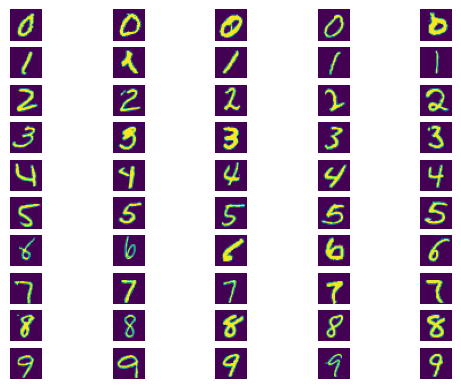

In [11]:
for i in range(10):
    digit_all_data = train[train.label == i]
    for j in range(5):
        digit_data = digit_all_data.iloc[rand.randint(0, digit_data.shape[0]), 1:]
        plt.subplot(10, 5, i * 5 + j + 1)
        plt.imshow(digit_data.values.reshape(28, 28))
        plt.axis("off")

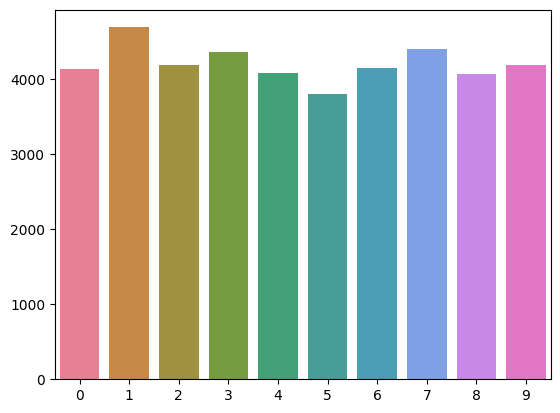

In [ ]:
plot = sns.barplot(x=list(train.label.value_counts().index), y=list(train.label.value_counts().values), palette='husl')